In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn


## Import csv file as df
df = pd.read_csv('C:/Users/jhall/Downloads/d206-churn.dictionary.files/churn_raw_data.csv', index_col = 0)

## Get general overview of data
df.info()

## Check data for duplicates, print duplicated, and drop duplicate values
df.duplicated()
print(df.duplicated().value_counts())
df = df.drop_duplicates()

## Check data for missing values
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education          

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

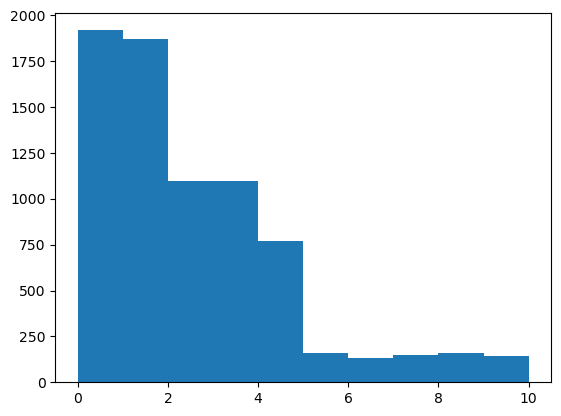

In [3]:
## Create histogram for 'children' to check skewdness.

plt.hist(df['Children'])

## Given right scewdness the null values should be filled with the median to preserve the data.

df['Children'].fillna(df['Children'].median(), inplace=True)




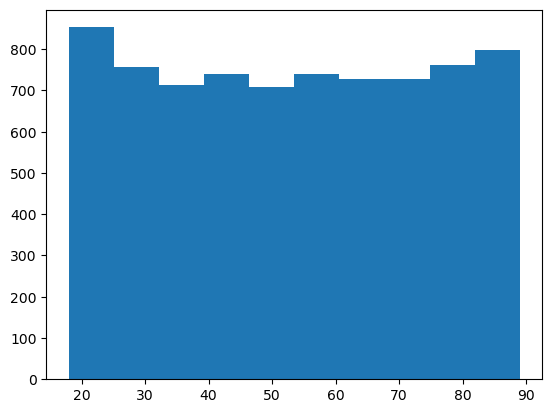

In [4]:
## Create histogram for 'Age' to check skewdness.

plt.hist(df['Age'])

## Given the uniform distribution the null values should be filled with the mean to preserve the data.

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
## Given right scewdness the null values should be filled with the median to preserve the data.

df['Children'].fillna(df['Children'].median(), inplace=True)

## Given right scewdness the null values should be filled with the median to preserve the data.

df['Income'].fillna(df['Income'].median(), inplace=True)

## 'Techie' , 'Phone', and 'TechSupport' , are qualitative and should be filled with the mode to preserve data integrity.

df['Techie'] = df['Techie'].fillna(df['Techie'].mode()[0])
df['Phone'] = df['Phone'].fillna(df['Phone'].mode()[0])
df['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])




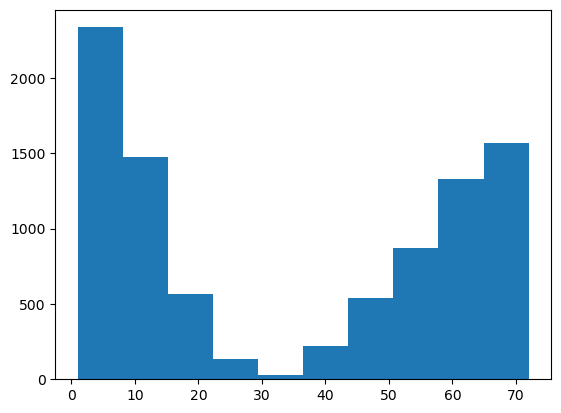

In [6]:
## Create histogram for 'Tenure' to check skewdness.

plt.hist(df['Tenure'])

## Given the bi-modal distribution mode should be used to fill null values.

df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mode()[0])

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

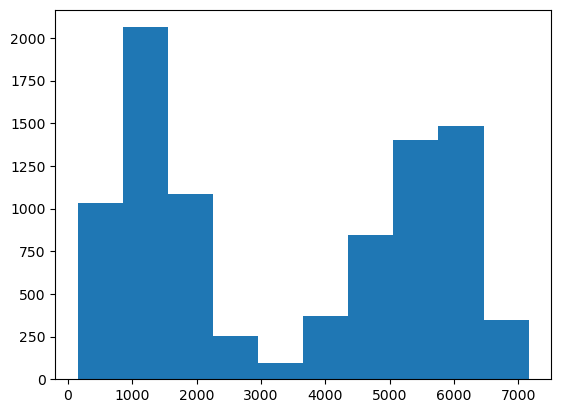

In [7]:
## Create histogram for 'Bandwidth_GB_year' to check skewdness.

plt.hist(df['Bandwidth_GB_Year'])

## Given the bi-modal distribution mode should be used to fill null values.

df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].mode()[0])

## Check that missing data has been filled

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 11 to 9983
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             451 non-null    int64  
 1   Customer_id           451 non-null    object 
 2   Interaction           451 non-null    object 
 3   City                  451 non-null    object 
 4   State                 451 non-null    object 
 5   County                451 non-null    object 
 6   Zip                   451 non-null    int64  
 7   Lat                   451 non-null    float64
 8   Lng                   451 non-null    float64
 9   Population            451 non-null    int64  
 10  Area                  451 non-null    object 
 11  Timezone              451 non-null    object 
 12  Job                   451 non-null    object 
 13  Children              451 non-null    float64
 14  Age                   451 non-null    float64
 15  Education            

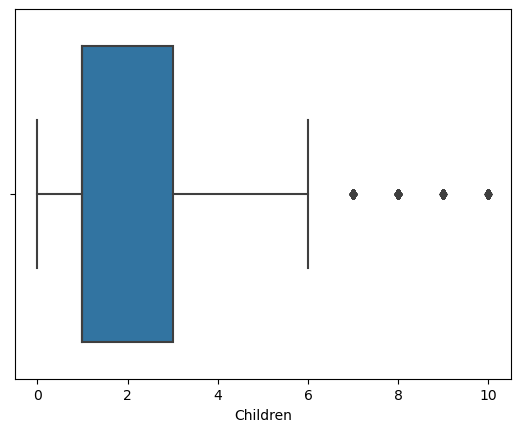

In [8]:
## Time to check quantitative variables for outliers. 
## First, I will import seaborn and then visualize boxplots for each relevant variable.
## CaseOrder, Lat, Lng, and population will be left out becuase of the nature of the variables.



## boxplot for 'Children'

children_boxplot = seaborn.boxplot(x='Children', data=df)

## To get a count of the number of outliers to help determine treatment

children_query = df.query('Children > 6')

children_query.info()

## Due to the large number (451) of outliers I believe it is best to exclude this data. 
## They do not represent a 'normal' customer but may be usefull for analyzing large families.

## Creating new DataFrame to store outliers
children_outliers = df[ (df['Children'] > 6)]

## Checking to make sure it include the expected amount

children_outliers.info()

## Dropping from the current DataFrame

df.drop(df[(df['Children'] > 6 )].index, inplace=True )

##Checking that the outliers are dropped
df.info()

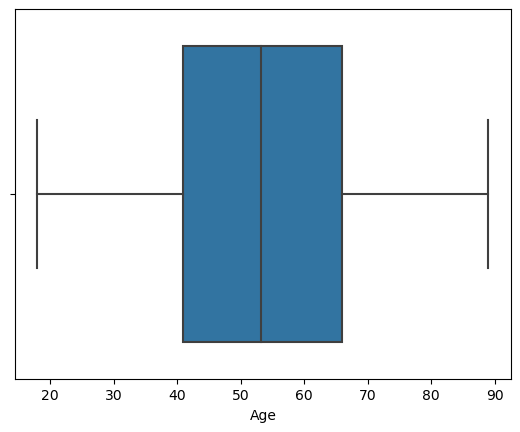

In [9]:
## boxplot for 'Age'
age_boxplot = seaborn.boxplot(x='Age', data=df)

## No outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 13 to 9988
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             818 non-null    int64  
 1   Customer_id           818 non-null    object 
 2   Interaction           818 non-null    object 
 3   City                  818 non-null    object 
 4   State                 818 non-null    object 
 5   County                818 non-null    object 
 6   Zip                   818 non-null    int64  
 7   Lat                   818 non-null    float64
 8   Lng                   818 non-null    float64
 9   Population            818 non-null    int64  
 10  Area                  818 non-null    object 
 11  Timezone              818 non-null    object 
 12  Job                   818 non-null    object 
 13  Children              818 non-null    float64
 14  Age                   818 non-null    float64
 15  Education            

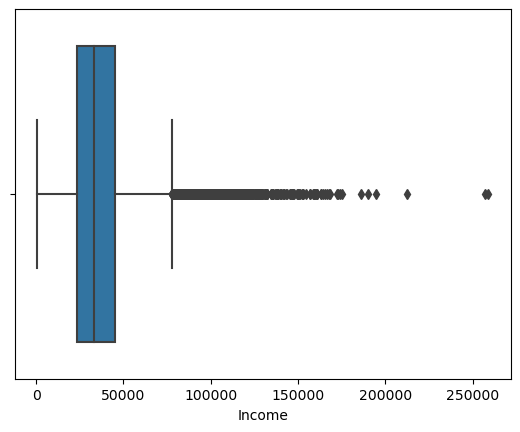

In [10]:
## boxplot for 'Income'

income_boxplot = seaborn.boxplot(x='Income', data=df)

## To get a count of the number of outliers to help determine treatment

income_query = df.query('Income > 75000')

income_query.info()

## Since the data is self reported by the customer I believe that we should impute the data

## Replacing outliers with null values to then fill the null values with median.

##Replacing

df['Income'] =  np.where(df['Income'] > 75000, np.nan, df['Income'])

## Filling

df['Income'].fillna(df['Income'].median(), inplace=True)

df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 29 to 9981
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             485 non-null    int64  
 1   Customer_id           485 non-null    object 
 2   Interaction           485 non-null    object 
 3   City                  485 non-null    object 
 4   State                 485 non-null    object 
 5   County                485 non-null    object 
 6   Zip                   485 non-null    int64  
 7   Lat                   485 non-null    float64
 8   Lng                   485 non-null    float64
 9   Population            485 non-null    int64  
 10  Area                  485 non-null    object 
 11  Timezone              485 non-null    object 
 12  Job                   485 non-null    object 
 13  Children              485 non-null    float64
 14  Age                   485 non-null    float64
 15  Education            

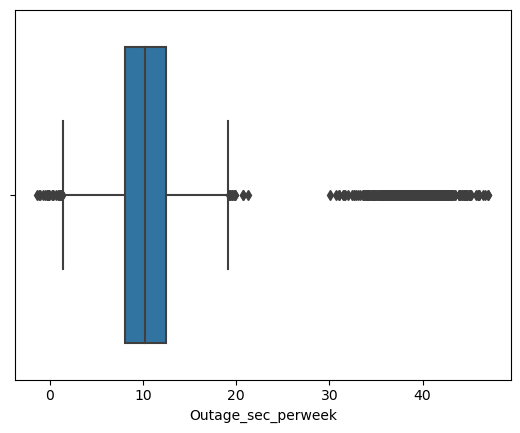

In [11]:
## boxplot for 'Outage_sec_perweek'
outage_boxplot = seaborn.boxplot(x='Outage_sec_perweek', data=df)

## To get a count of the number of outliers to help determine treatment

outage_query = df.query('Outage_sec_perweek > 20' or 'Outage_sec_perweek <2')

outage_query.info()

## Given this is data from tech support I think this number of outage outliers is expected.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 427 to 9751
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             8 non-null      int64  
 1   Customer_id           8 non-null      object 
 2   Interaction           8 non-null      object 
 3   City                  8 non-null      object 
 4   State                 8 non-null      object 
 5   County                8 non-null      object 
 6   Zip                   8 non-null      int64  
 7   Lat                   8 non-null      float64
 8   Lng                   8 non-null      float64
 9   Population            8 non-null      int64  
 10  Area                  8 non-null      object 
 11  Timezone              8 non-null      object 
 12  Job                   8 non-null      object 
 13  Children              8 non-null      float64
 14  Age                   8 non-null      float64
 15  Education             

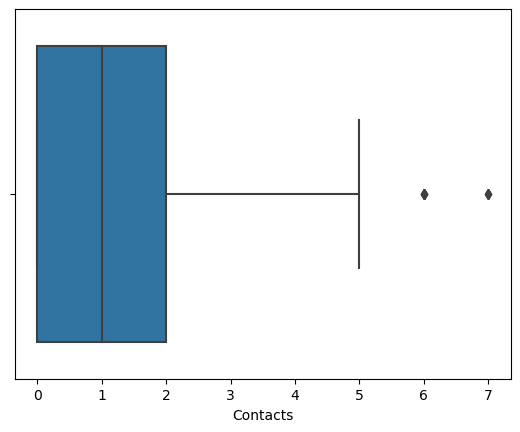

In [12]:
## boxplot for 'Contacts'
contacts_boxplot = seaborn.boxplot(x='Contacts', data=df)

## To get a count of the number of outliers to help determine treatment

contacts_query = df.query('Contacts > 5')

contacts_query.info()

## Normal and expected given the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 9 to 9968
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             90 non-null     int64  
 1   Customer_id           90 non-null     object 
 2   Interaction           90 non-null     object 
 3   City                  90 non-null     object 
 4   State                 90 non-null     object 
 5   County                90 non-null     object 
 6   Zip                   90 non-null     int64  
 7   Lat                   90 non-null     float64
 8   Lng                   90 non-null     float64
 9   Population            90 non-null     int64  
 10  Area                  90 non-null     object 
 11  Timezone              90 non-null     object 
 12  Job                   90 non-null     object 
 13  Children              90 non-null     float64
 14  Age                   90 non-null     float64
 15  Education             9

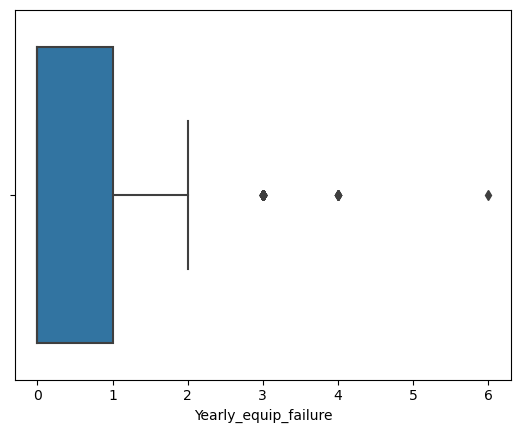

In [13]:
## boxplot for 'Yearly_equip_failure'
equip_failure_boxplot = seaborn.boxplot(x='Yearly_equip_failure', data=df)

## To get a count of the number of outliers to help determine treatment

failure_query = df.query('Yearly_equip_failure > 2')

failure_query.info()

## Normal and expected given the data 

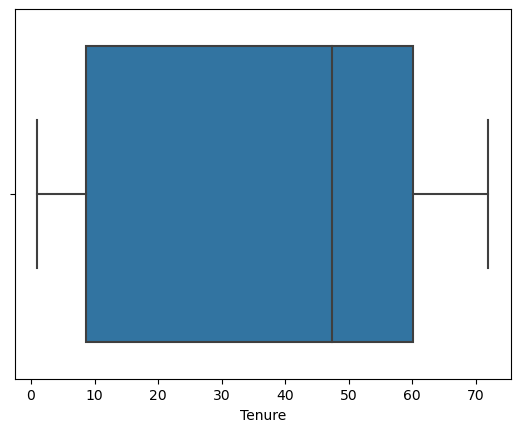

In [14]:
## boxplot for ''Tenure'
tenure_boxplot = seaborn.boxplot(x='Tenure', data=df)

## No outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 799 to 8756
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             17 non-null     int64  
 1   Customer_id           17 non-null     object 
 2   Interaction           17 non-null     object 
 3   City                  17 non-null     object 
 4   State                 17 non-null     object 
 5   County                17 non-null     object 
 6   Zip                   17 non-null     int64  
 7   Lat                   17 non-null     float64
 8   Lng                   17 non-null     float64
 9   Population            17 non-null     int64  
 10  Area                  17 non-null     object 
 11  Timezone              17 non-null     object 
 12  Job                   17 non-null     object 
 13  Children              17 non-null     float64
 14  Age                   17 non-null     float64
 15  Education            

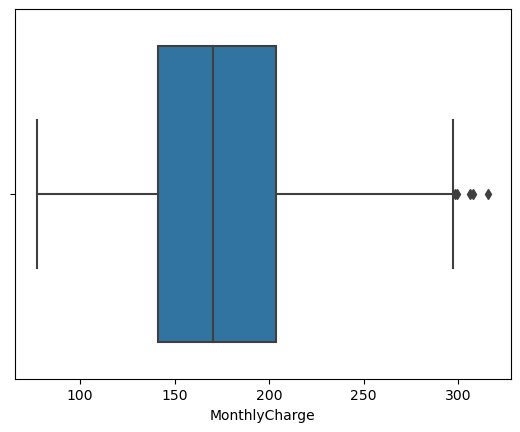

In [15]:
## boxplot for 'MonthlyCharge'
charge_boxplot = seaborn.boxplot(x='MonthlyCharge', data=df)

## To get a count of the number of outliers to help determine treatment

charge_query = df.query('MonthlyCharge > 290')

charge_query.info()

## Normal and expected given the data

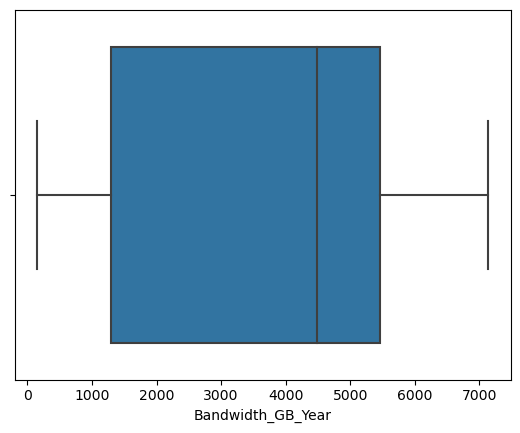

In [16]:
## boxplot for 'Bandwidth_GB_year'
bandwitdth_boxplot = seaborn.boxplot(x='Bandwidth_GB_Year', data=df)

## No outliers

In [17]:
## Changing the Dtype of item1 - item8 because they are categorical survey responses and not integers. 

df['item1'] = df['item1'].astype('object')
df['item2'] = df['item2'].astype('object')
df['item3'] = df['item3'].astype('object')
df['item4'] = df['item4'].astype('object')
df['item5'] = df['item5'].astype('object')
df['item6'] = df['item6'].astype('object')
df['item7'] = df['item7'].astype('object')
df['item8'] = df['item8'].astype('object')

##Checking that the type has changed

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9549 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             9549 non-null   int64  
 1   Customer_id           9549 non-null   object 
 2   Interaction           9549 non-null   object 
 3   City                  9549 non-null   object 
 4   State                 9549 non-null   object 
 5   County                9549 non-null   object 
 6   Zip                   9549 non-null   int64  
 7   Lat                   9549 non-null   float64
 8   Lng                   9549 non-null   float64
 9   Population            9549 non-null   int64  
 10  Area                  9549 non-null   object 
 11  Timezone              9549 non-null   object 
 12  Job                   9549 non-null   object 
 13  Children              9549 non-null   float64
 14  Age                   9549 non-null   float64
 15  Education           

In [18]:
## Exporting clean data as .csv
df.to_csv("C:/Users/jhall/Downloads/d206-churn.dictionary.files/cleanedD206.csv")

In [19]:
## importing tool for use in pca
from sklearn.decomposition import PCA

In [20]:
## Creating new DataFrame for PCA
df_pca = df[['Outage_sec_perweek','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year']]

## Normalizing data

df_pca_normalized = (df_pca-df_pca.mean())/df_pca.std()

pca = PCA(n_components=df_pca.shape[1])

pca.fit(df_pca_normalized)

df_pca_actual = pd.DataFrame(pca.transform(df_pca_normalized),
                           columns=['PC1','PC2','PC3','PC4'])  

## Loading the PCA
loadings = pd.DataFrame(pca.components_.T,
               columns=['PC1','PC2','PC3','PC4'],
               index=df_pca.columns)
loadings

,PC1,PC2,PC3,PC4
Outage_sec_perweek,0.644294,-0.134831,0.373559,0.653574
Yearly_equip_failure,0.045836,0.886394,0.445554,-0.116986
MonthlyCharge,0.690047,-0.132890,0.006590,-0.711430
Bandwidth_GB_Year,0.326527,0.422453,-0.813567,0.230266


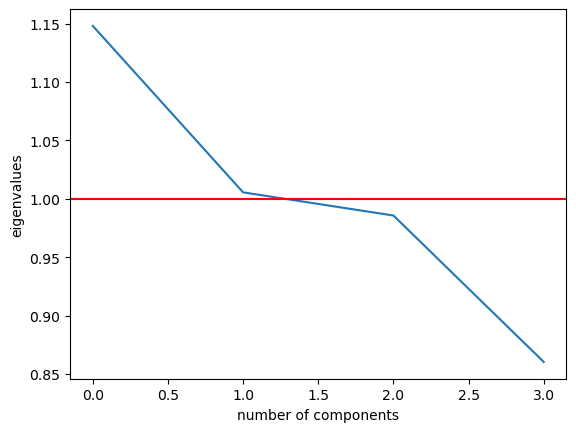

In [21]:
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]

eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

##Plot eigenvalues

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.show()
